In [1]:
!git clone https://github.com/muzeyir/Fake-News-Detection-NLP.git

Cloning into 'Fake-News-Detection-NLP'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 39 (delta 0), reused 2 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (39/39), 40.74 MiB | 9.25 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (6/6), done.


In [2]:
# datayi birlestiririk rahat isleye bilmek ucun + label column u elave edirik Truelar 1, Fakeler 0 olaraq

import pandas as pd

true_df = pd.read_csv("/content/Fake-News-Detection-NLP/data/raw/True.csv")
fake_df = pd.read_csv('/content/Fake-News-Detection-NLP/data/raw/Fake.csv')

true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], ignore_index= True)

df = df.sample(frac=1, random_state = 42).reset_index(drop = True)

df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [3]:
print(df.shape)
print(df['label'].value_counts())
print(df.isnull().sum())

(44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64
title      0
text       0
subject    0
date       0
label      0
dtype: int64


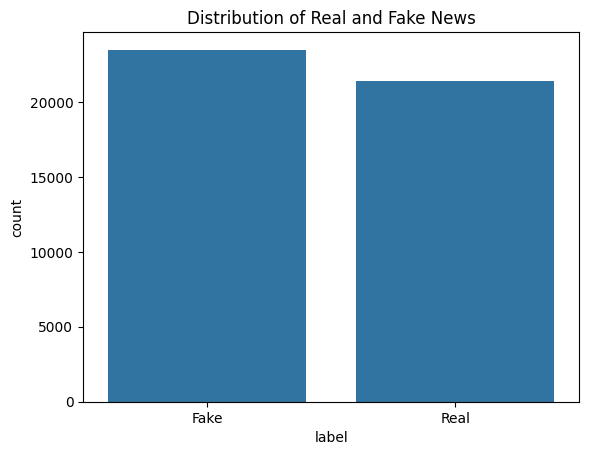

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x= 'label')
plt.title('Distribution of Real and Fake News')
plt.xticks(ticks = [0,1], labels = ['Fake', 'Real'])
plt.show()

In [5]:
df_eda = df.copy()

df_eda['text_len'] = df_eda['text'].apply(len)
df_eda['word_count'] = df_eda['text'].apply(lambda x: len(x.split()))
df_eda['title_word_count'] = df_eda['title'].apply(lambda x: len(x.split()))

df_eda[['text_len','word_count','title_word_count']].head()

,text_len,word_count,title_word_count
0,2114,361,11
1,2823,495,9
2,2402,379,14
3,629,88,9
4,793,138,19


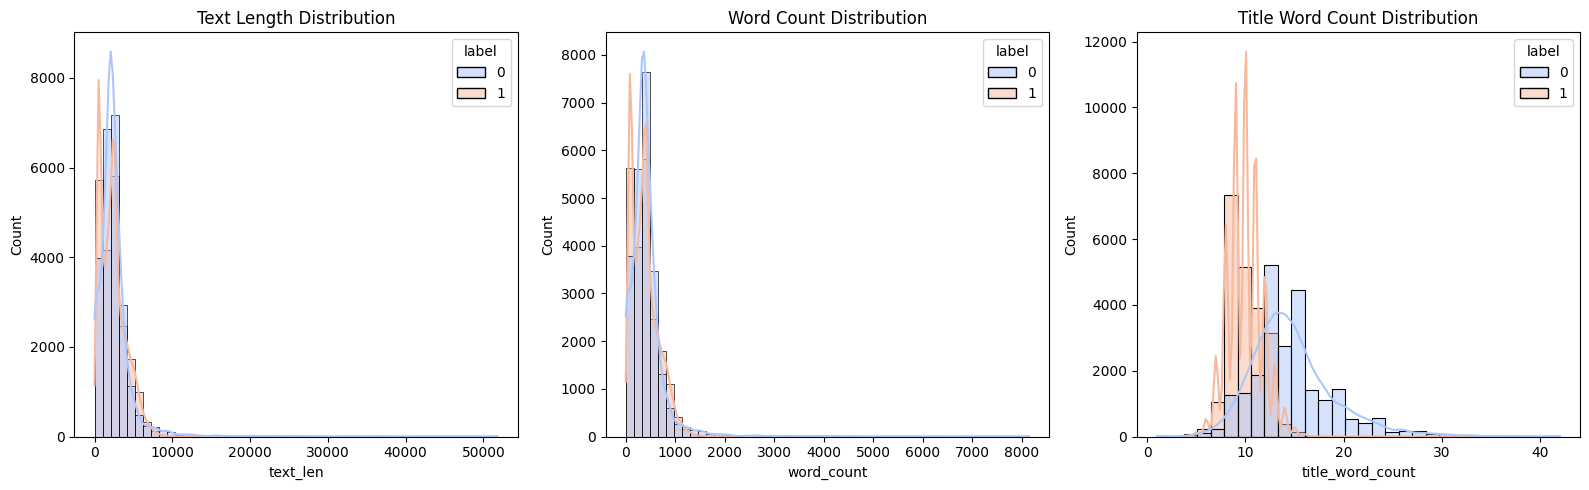

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(16,5))

plt.subplot(1,3,1)
sns.histplot(data = df_eda, x= 'text_len', hue = 'label', bins = 50, kde= True, palette = 'coolwarm')
plt.title('Text Length Distribution')

plt.subplot(1,3,2)
sns.histplot(data = df_eda, x = 'word_count', hue = 'label', bins = 50, kde = True, palette = 'coolwarm')
plt.title('Word Count Distribution')

plt.subplot(1,3,3)
sns.histplot(data = df_eda, x = 'title_word_count', hue = 'label', bins = 30, kde = True, palette = 'coolwarm')
plt.title('Title Word Count Distribution')

plt.tight_layout()
plt.show()

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?\S+|www\.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
# pip install nltk

In [9]:
df_eda['clean_text'] = df_eda['text'].apply(clean_text)

In [10]:
df_eda.head()

,title,text,subject,date,label,text_len,word_count,title_word_count,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2114,361,11,donald trump white house chaos trying cover ru...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,2823,495,9,donald trump presumptive gop nominee time reme...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2402,379,14,mike penny huge homophobe support exgay conver...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,629,88,9,san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,793,138,19,twisted reasoning come pelosi day especially p...


In [11]:
df_eda.shape

(44898, 9)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)

X_tfidf = tfidf_vectorizer.fit_transform(df_eda['clean_text'])

y = df_eda['label']

In [13]:
print(X_tfidf.shape)
print(X_tfidf[0].toarray())
print(tfidf_vectorizer.get_feature_names_out()[:10])

(44898, 5000)
[[0. 0. 0. ... 0. 0. 0.]]
['abandon' 'abandoned' 'abbas' 'abc' 'abdullah' 'abe' 'abedin' 'ability'
 'able' 'aboard']


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

X = X_tfidf
y = df_eda['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42, stratify=y

)

print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train distribution : {np.bincount(y_train)}')
print(f'y_test distribution : {np.bincount(y_test)}')

X_train shape : (35918, 5000)
X_test shape : (8980, 5000)
y_train distribution : [18785 17133]
y_test distribution : [4696 4284]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, y_pred))
print('\nClassifaction Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9887527839643653

Classifaction Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



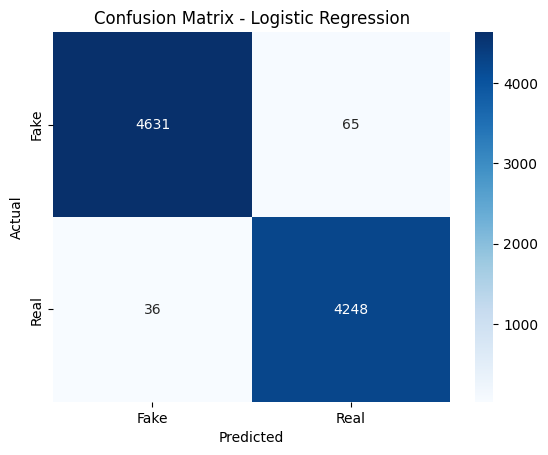

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Fake', 'Real'], yticklabels = ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy (Random Forest): ', accuracy_rf)

print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest):  0.9974387527839643

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



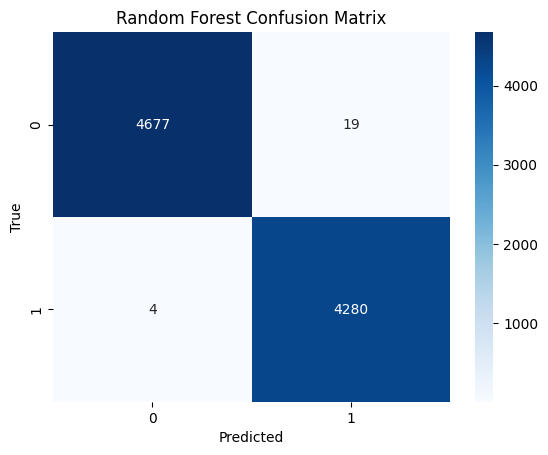

In [18]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

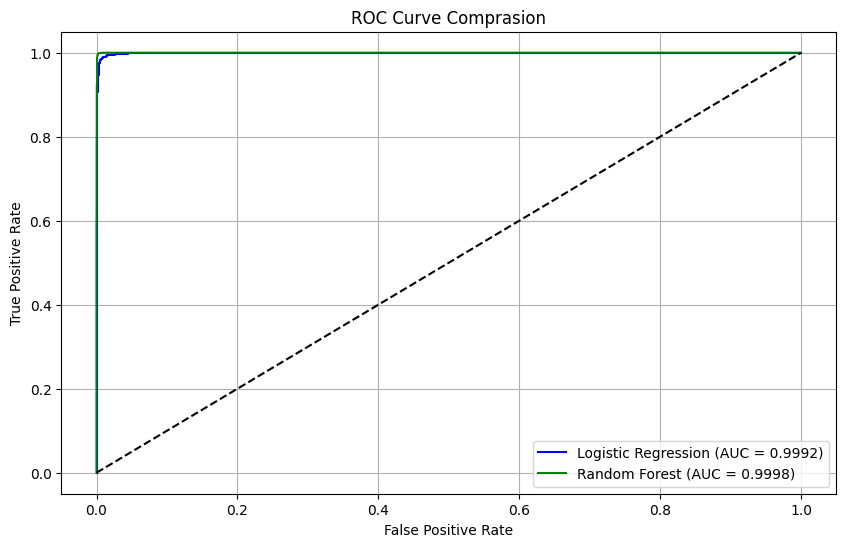

In [19]:
from sklearn.metrics import roc_curve, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score, auc
import matplotlib.pyplot as plt

y_probs_lr = lr_model.predict_proba(X_test)[:,1]
y_probs_rf = rf_model.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize = (10,6))
plt.plot(fpr_lr, tpr_lr, label = f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color = 'blue')
plt.plot(fpr_rf, tpr_rf, label = f'Random Forest (AUC = {roc_auc_rf:.4f})', color = 'green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comprasion')
plt.legend()
plt.grid()
plt.show()

In [27]:
pip install tensorflow

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

vocab_size = 2000
max_len = 200

tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df_eda['clean_text'])

sequences = tokenizer.texts_to_sequences(df_eda['clean_text'])

X = pad_sequences(sequences, maxlen = max_len, padding = 'post', truncating = 'post')
y = df_eda['label'].values



In [29]:
!pip install tensorflow

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = vocab_size, output_dim = 128, input_length = max_len))
model_lstm.add(LSTM(64, return_sequences = False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1,activation = 'sigmoid'))

model_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model_lstm.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_data = (X_test,y_test))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6360 - loss: 0.5877 - val_accuracy: 0.9161 - val_loss: 0.2737
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9118 - loss: 0.2727 - val_accuracy: 0.5024 - val_loss: 1.1703
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5934 - loss: 0.6653 - val_accuracy: 0.9251 - val_loss: 0.2198
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8412 - loss: 0.3979 - val_accuracy: 0.9742 - val_loss: 0.0850
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9619 - loss: 0.1184 - val_accuracy: 0.9871 - val_loss: 0.0412


In [34]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'{accuracy}')

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9873 - loss: 0.0425
0.9870824217796326


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


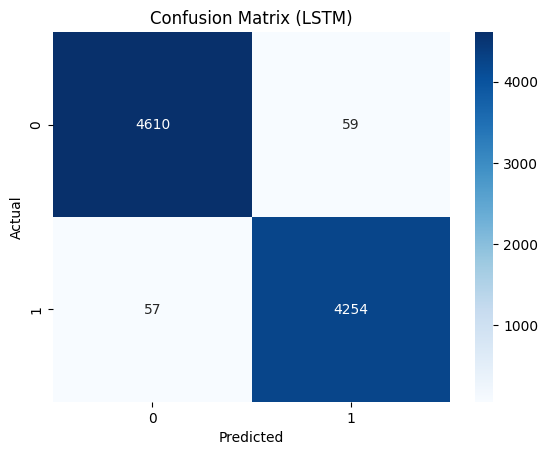

Classification report (LSTM) : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

ROC AUC (LSTM) : 0.9982


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model_lstm.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype('int32')

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix (LSTM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification report (LSTM) : \n ', classification_report(y_test, y_pred_classes))
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f'ROC AUC (LSTM) : {roc_auc:.4f}')